In [2]:
# いつも使うやつ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interp
import seaborn as sns

# pandasで全ての列を表示
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# 図をipython notebook内で表示
%matplotlib inline

# DeplicatedWarningを避けるため
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

import sys
sys.path.append('./lib/')

# 交差検定をサクッとやるためのモジュールを読み込む
from sklearn.cross_validation import cross_val_score

# 説明変数つくるための関数
import feature_process_helper
import get_data
import learn
import my_validate

# submissionを書き込む関数
import write_submission

/Users/k.tamashiro/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# データをそれぞれ読み込む
train_df, test_df, submission_df = get_data.get(path='./data')
train = train_df.copy()
test = test_df.copy()

In [4]:
train, test = feature_process_helper.cabin_fillna(train, test, submission_df)
train, test = feature_process_helper.names(train, test, submission_df)
train, test = feature_process_helper.age_null_flag(train, test)
train, test = feature_process_helper.age_impute3(train, test)
train, test = feature_process_helper.age_class(train, test)
train, test = feature_process_helper.apply_ticket_count(train, test)
train, test = feature_process_helper.family_size_int(train, test)
train, test = feature_process_helper.same_ticket_grouping(train, test, submission_df)
train ,test = feature_process_helper.ticket_length(train, test)
train, test = feature_process_helper.cabin_count(train, test)
train, test = feature_process_helper.cabin_null_flag(train, test)
train, test = feature_process_helper.cabin_num(train, test)
train, test = feature_process_helper.cabin(train, test)
train, test = feature_process_helper.embarked_impute(train, test)
train, test = feature_process_helper.fam_size(train, test)
train, test = feature_process_helper.dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size', 'SameTicket', 'AgeClass', 'CabinPrefix'])
train, test = feature_process_helper.drop(train, test, bye = [
    'Sex_male',
    'Ticket',
])

test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [5]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Name_Len,SameLastName,Age_Null_Flag,TicketCount,FamilySize,Ticket_Len,CabinCount,Cabin_Null_Flag,"Cabin_num_[2, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148]",Pclass_3,Pclass_1,Pclass_2,Sex_female,Embarked_S,Embarked_C,Embarked_Q,Cabin_Letter_n,Cabin_Letter_C,Cabin_Letter_E,Cabin_Letter_G,Cabin_Letter_D,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_F,Name_Title_Mr.,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big,SameTicket_Not_Same,SameTicket_Male_Female,SameTicket_Only_Male,SameTicket_Only_Female,AgeClass_20,AgeClass_30,AgeClass_50,AgeClass_0,AgeClass_10,AgeClass_40,AgeClass_60,AgeClass_70,CabinPrefix_F,CabinPrefix_C,CabinPrefix_D,CabinPrefix_G,CabinPrefix_E,CabinPrefix_A,CabinPrefix_B
0,1,0,22.0,1,0,7.2500,23,1,0,0,2,9,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,51,1,0,0,2,8,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,22,0,0,0,1,16,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,44,1,0,2,2,6,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,24,1,0,0,1,6,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


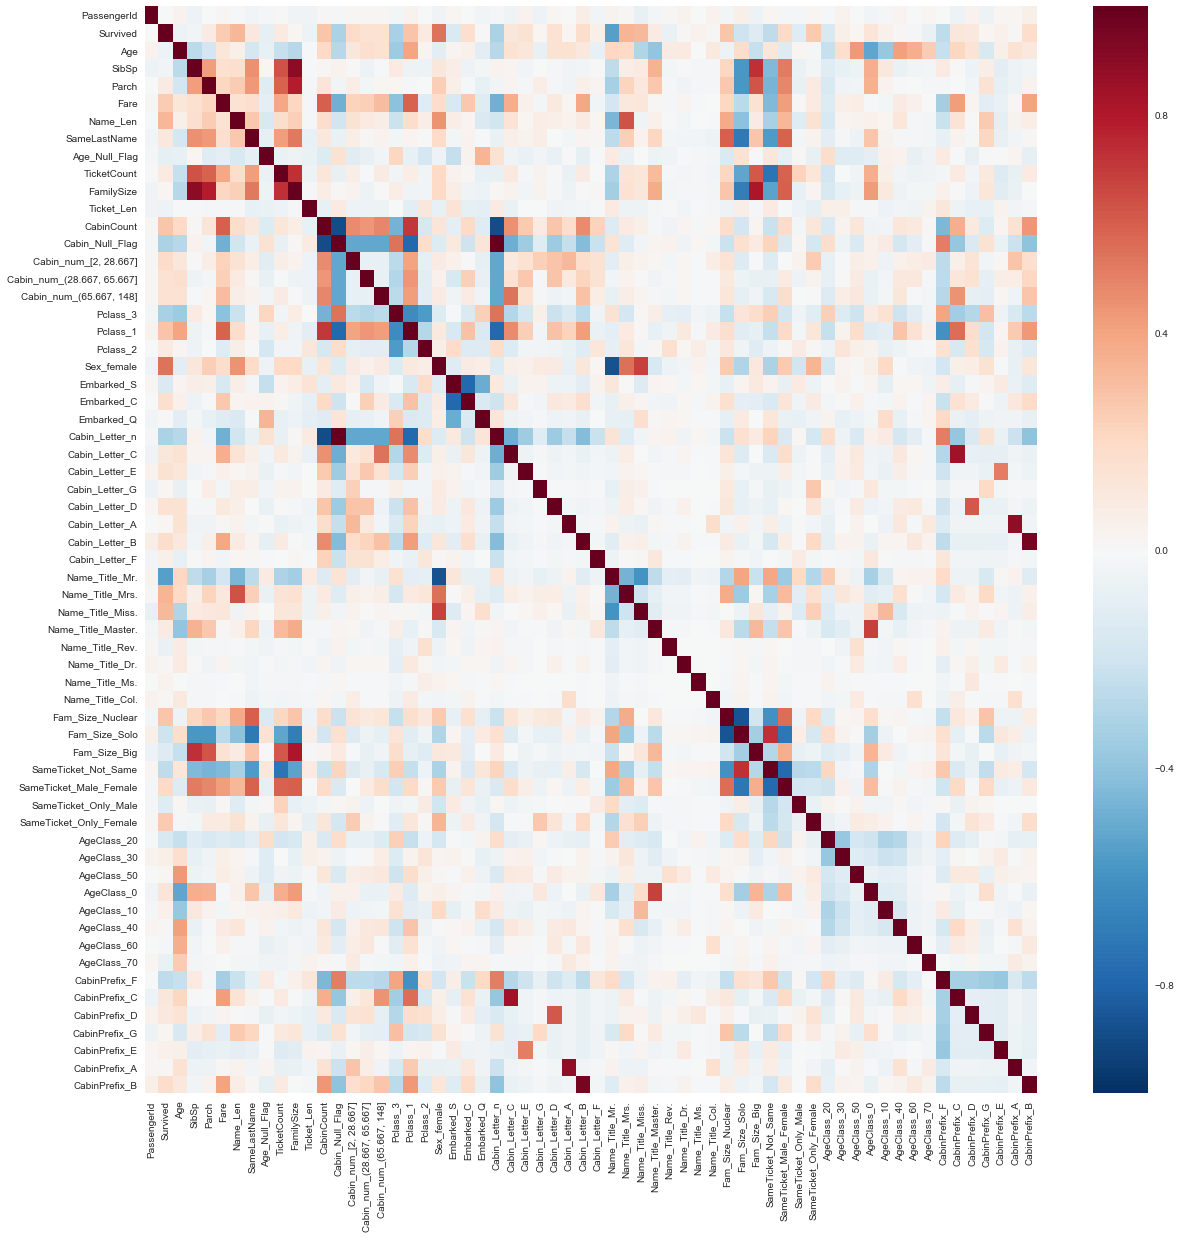

In [6]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train.corr(), ax=ax)

In [7]:
search = learn.search(train.iloc[:, 2:],  train.iloc[:, 1])
model = learn.learn(train.iloc[:, 2:], train.iloc[:, 1], parameter=search.best_params_)

In [8]:
cv_scores = cross_val_score(model, train.iloc[:, 2:], train.iloc[:, 1], cv=10, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_scores), np.std(cv_scores)))

CV accuracy: 0.835 +/- 0.034


In [9]:
my_validate.get_feature_importances(train.iloc[:, 2:], model)

,variable,importance
30,Name_Title_Mr.,0.130596
18,Sex_female,0.128365
3,Fare,0.075980
4,Name_Len,0.075875
0,Age,0.057816
32,Name_Title_Miss.,0.042082
9,Ticket_Len,0.032146
15,Pclass_3,0.032141
7,TicketCount,0.030783
31,Name_Title_Mrs.,0.030301


In [10]:
my_validate.cross(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

正解: 818
正解で生存を当てた: 294
正解で死亡を当てた: 524
予期しない: 25
欠落した: 48
間違い: 73


In [11]:
my_validate.matrix(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

[[524  25]
 [ 48 294]]


In [12]:
tp, tn, fp, fn = my_validate.get_threat_score(train.iloc[:, 1:], train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

294 : 524 : 25 : 48


In [13]:
write_submission._write(model=model, test=test.iloc[:, 1:], submission_df=submission_df)

0.76555

おちたぁあぁあああああああ！！！くそがぁああああああああ！！！

In [15]:
# データをそれぞれ読み込む
train_df, test_df, submission_df = get_data.get(path='./data')
train = train_df.copy()
test = test_df.copy()

In [16]:
train, test = feature_process_helper.cabin_fillna(train, test, submission_df)
train, test = feature_process_helper.names(train, test, submission_df)
train, test = feature_process_helper.age_null_flag(train, test)
train, test = feature_process_helper.age_impute3(train, test)
train, test = feature_process_helper.age_class(train, test)
train, test = feature_process_helper.apply_ticket_count(train, test)
train, test = feature_process_helper.family_size_int(train, test)
train, test = feature_process_helper.same_ticket_grouping(train, test, submission_df)
train ,test = feature_process_helper.ticket_length(train, test)
train, test = feature_process_helper.cabin_count(train, test)
train, test = feature_process_helper.cabin_null_flag(train, test)
# train, test = feature_process_helper.cabin_num(train, test)
train, test = feature_process_helper.cabin(train, test)
train, test = feature_process_helper.embarked_impute(train, test)
train, test = feature_process_helper.fam_size(train, test)
train, test = feature_process_helper.dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size', 'SameTicket', 'AgeClass', 'CabinPrefix'])
train, test = feature_process_helper.drop(train, test, bye = [
    'Sex_male',
    'Ticket',
])

test['Fare'].fillna(train['Fare'].median(), inplace = True)

In [17]:
search = learn.search(train.iloc[:, 2:],  train.iloc[:, 1])
model = learn.learn(train.iloc[:, 2:], train.iloc[:, 1], parameter=search.best_params_)

In [18]:
cv_scores = cross_val_score(model, train.iloc[:, 2:], train.iloc[:, 1], cv=10, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_scores), np.std(cv_scores)))

CV accuracy: 0.833 +/- 0.033


In [19]:
my_validate.get_feature_importances(train.iloc[:, 2:], model)

,variable,importance
15,Sex_female,0.139057
27,Name_Title_Mr.,0.107026
3,Fare,0.077970
4,Name_Len,0.075018
0,Age,0.064633
9,Ticket_Len,0.038161
12,Pclass_3,0.034183
7,TicketCount,0.033809
29,Name_Title_Miss.,0.032757
28,Name_Title_Mrs.,0.026876


In [20]:
my_validate.cross(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

正解: 814
正解で生存を当てた: 296
正解で死亡を当てた: 518
予期しない: 31
欠落した: 46
間違い: 77


In [21]:
my_validate.matrix(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

[[518  31]
 [ 46 296]]


In [22]:
tp, tn, fp, fn = my_validate.get_threat_score(train.iloc[:, 1:], train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

296 : 518 : 31 : 46


In [23]:
write_submission._write(model=model, test=test.iloc[:, 1:], submission_df=submission_df)

0.78469

微妙に下がったぁあああ！！